In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
import numpy as np

In [ ]:
# Load the data

In [347]:
df = pd.read_csv("archive.zip")

In [348]:
df.head()

,country,alcconsumption,incomeperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,0.03,NaN,6.684385,55.700001,24.04
1,Albania,7.29,1914.996551,7.699330,51.400002,46.72
2,Algeria,0.69,2231.993335,4.848770,50.500000,65.22
3,Andorra,10.17,21943.339900,5.362179,NaN,88.92
4,Angola,5.57,1381.004268,14.554677,75.699997,56.70


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          213 non-null    object 
 1   alcconsumption   187 non-null    float64
 2   incomeperperson  190 non-null    float64
 3   suicideper100th  191 non-null    float64
 4   employrate       178 non-null    float64
 5   urbanrate        203 non-null    float64
dtypes: float64(5), object(1)
memory usage: 10.1+ KB


In [ ]:
# Drop null values

In [ ]:
temp.dropna(inplace=True)

In [349]:
temp = df

## Scale the data

In [351]:
temp.dropna(inplace=True)

# Kelbow
### Make a kelbow to see how many cluster groups would be ideal

In [ ]:
# Start with scaling the data for the Kelbow

In [6]:
scaler = StandardScaler()

In [7]:
temp_num = temp.select_dtypes("number")

In [8]:
scaled_data = scaler.fit_transform(temp_num)

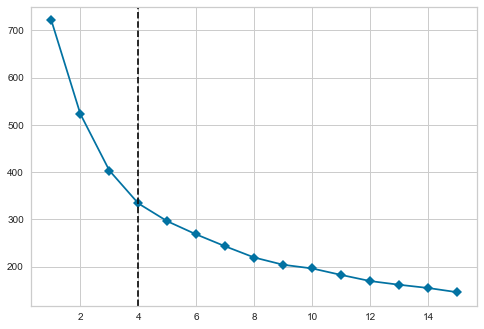

In [15]:
elbow = KElbowVisualizer(KMeans(), k = (1,16), timings=False)

elbow.fit(temp_num)

plt.show()

In [ ]:
# Choose to work with 4 different clusters/groups

In [220]:
kmeans = KMeans(4)

In [235]:
kmeans.fit(temp_num)

all_pc = kmeans.labels_

In [ ]:
# Make a cluster column in the "temp" dataframe

In [352]:
temp["clusters"] = all_pc

In [241]:
temp

,country,alcconsumption,incomeperperson,suicideper100th,employrate,urbanrate,clusters,continent,groups,continents
1,Albania,0.122908,-0.479850,-0.308977,-0.689804,-0.422488,2,Europe,Medel Rika (Asien/Afrika/Nordamerika),Europe
2,Algeria,-1.227753,-0.457566,-0.762623,-0.775602,0.355276,2,Africa,Medel Rika (Asien/Afrika/Nordamerika),Africa
4,Angola,-0.229083,-0.517388,0.782002,1.626717,-0.002916,0,Africa,Fattiga Länder (Afrika/Asien),Africa
6,Argentina,0.544477,0.141190,-0.298433,-0.022493,1.481142,1,South America,Medel Rika (Europa),South America
7,Armenia,1.426500,-0.521203,-0.938824,-1.767035,0.298100,2,Asia,Medel Rika (Asien/Afrika/Nordamerika),Asia
...,...,...,...,...,...,...,...,...,...,...
207,Venezuela,0.186348,-0.225838,-0.878662,0.120502,1.536637,2,South America,Medel Rika (Europa),South America
208,Vietnam,-0.568794,-0.563658,0.320272,1.178666,-1.216228,0,Asia,Fattiga Länder (Afrika/Asien),Asia
210,Yemen,-1.328029,-0.571563,-0.537115,-1.871898,-1.098512,2,Asia,Medel Rika (Asien/Afrika/Nordamerika),Asia
211,Zambia,-0.640420,-0.584085,0.378473,0.225365,-0.897555,0,Africa,Fattiga Länder (Afrika/Asien),Africa


In [242]:
sns.set_palette("Set2")

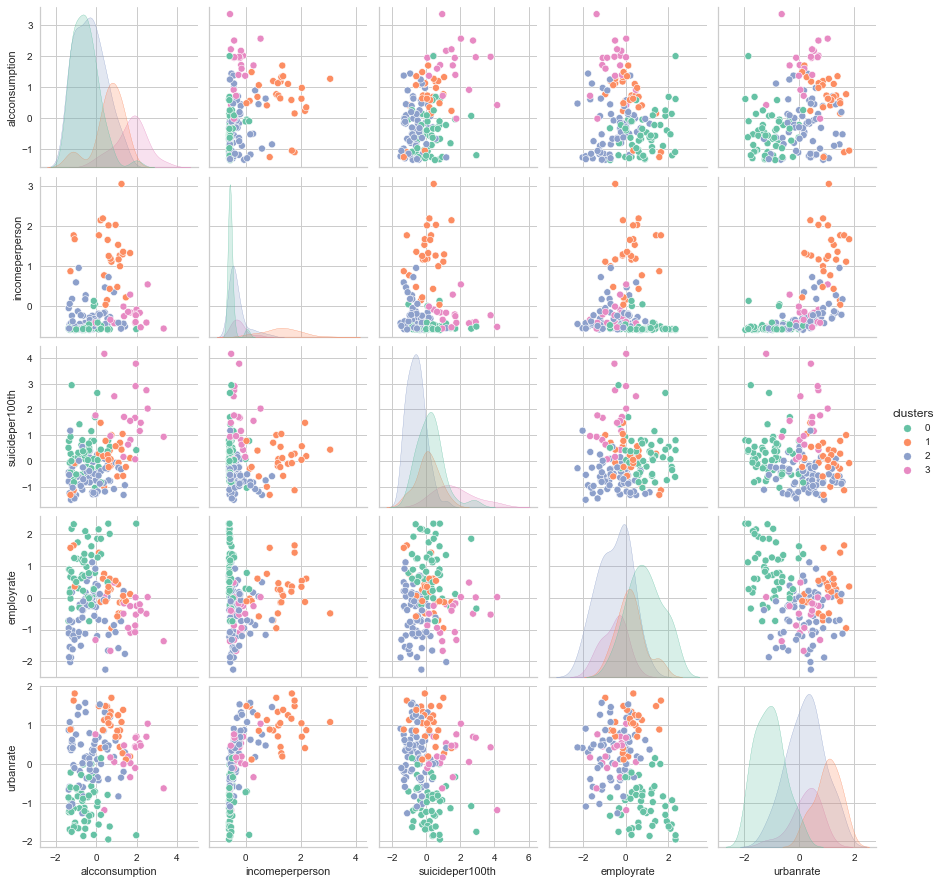

In [243]:
sns.pairplot(data=temp, hue="clusters", palette=("Set2"))

In [ ]:
# Used a libary to sort the countries by continents

# https://pypi.org/project/a-world-of-countries/

In [245]:
import awoc
my_world = awoc.AWOC()

In [246]:
my_world.get_continents()

[{'Continent Code': 'af', 'Continent Name': 'Africa'},
 {'Continent Code': 'an', 'Continent Name': 'Antarctica'},
 {'Continent Code': 'as', 'Continent Name': 'Asia'},
 {'Continent Code': 'eu', 'Continent Name': 'Europe'},
 {'Continent Code': 'na', 'Continent Name': 'North America'},
 {'Continent Code': 'oc', 'Continent Name': 'Oceania'},
 {'Continent Code': 'sa', 'Continent Name': 'South America'}]

In [ ]:
# Some of the countries was shorten in the dataframe so renamed their name so it would match the awoc libary

In [354]:
temp.loc[temp.country == "Central African Rep.", "country"] = "Central African Republic"

In [355]:
temp.loc[temp.country == "Congo, Dem. Rep.", "country"] = "Democratic Republic of the Congo"

In [356]:
temp.loc[temp.country == "Congo, Rep.", "country"] = "Republic of the Congo"

In [357]:
temp.loc[temp.country.str.contains("Cote"), "country"] = "Ivory Coast"

In [358]:
temp.loc[temp.country.str.contains("Czech"), "country"] = "Czech Republic"

In [359]:
temp.loc[temp.country.str.contains("Dominican Rep"), "country"] = "Dominican Republic"

In [360]:
temp.loc[temp.country.str.contains("Korea"), "country"] = "South Korea"

In [361]:
temp.loc[temp.country.str.contains("Macedonia"), "country"] = "Macedonia"

In [362]:
temp.loc[temp.country.str.contains("Slovak Republic"), "country"] = "Slovakia"

In [363]:
temp.loc[temp.country.str.contains("Timor-Leste"), "country"] = "East Timor"

In [364]:
temp.loc[temp.country.str.contains("Yemen"), "country"] = "Yemen"

In [ ]:
# Looped through the countries in the df to find which continent they belong to

In [365]:
continents_lst = []

for i in temp.country:
    continents_lst.append(my_world.get_country_data(i)['Continent Name'])

In [ ]:
# Adding the contintents

In [368]:
temp["continent"] = continents_lst

In [ ]:
# See if there are any interesting patterns in the clusters

In [380]:
temp.groupby(["continent"]).suicideper100th.mean()

continent
Africa            9.143532
Asia              9.580835
Europe           12.823861
North America     7.011086
Oceania           8.444143
South America     9.948888
Name: suicideper100th, dtype: float64

In [381]:
temp.groupby(["clusters"]).suicideper100th.mean()

clusters
0    11.192311
1    10.130660
2     5.884152
3    20.053032
Name: suicideper100th, dtype: float64

In [385]:
temp.groupby(["clusters"]).incomeperperson.mean()

clusters
0     1173.701253
1    27111.989166
2     4324.091426
3     5267.651684
Name: incomeperperson, dtype: float64

In [504]:
temp.groupby(["clusters"]).continents.value_counts().to_frame().unstack().fillna(0).astype(int)

continents                                                
continents     Africa Asia Europe North America Oceania South America
clusters                                                             
0                  31   14      0             2       3             1
1                   0    4     16             3       2             2
2                  17   20      8            12       1             7
3                   1    2     14             0       0             2

In [ ]:
# The clusters seem to be mostly formed by income per person and which contintents they belong to.
# So I made a new feature and named each cluster.

# cluster 0 = poor countries in Africa and Asia
# cluster 1 = Rich countries in europe
# cluster 2 = average rich countries in Asia, Africa and North America 
# cluster 3 = Average rich countries in Europe

In [370]:
df["groups"] = df.clusters

In [373]:
dct = {0:"Fattiga Länder (Afrika/Asien)", 1:"Rika Länder(Europa)", 
 2:"Medel Rika (Asien/Afrika/Nordamerika)",  3:"Medel Rika (Europa)"}

In [374]:
df.groups = df.groups.map(dct)

# Creating plots

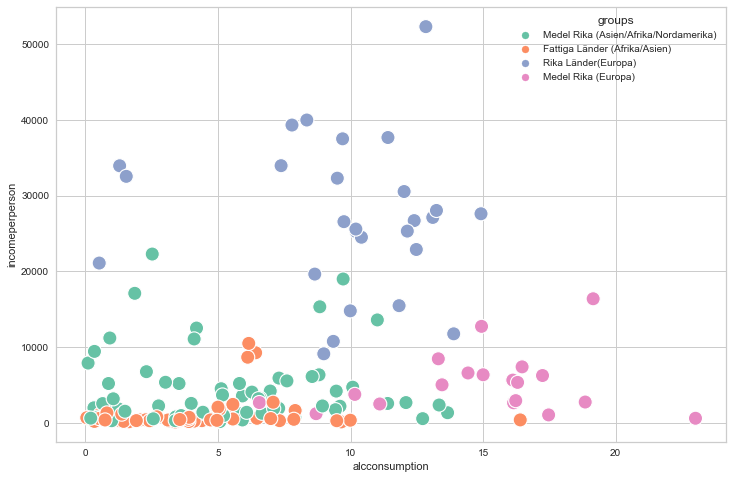

In [375]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="alcconsumption", y="incomeperperson", hue="groups", 
                s=200, palette="Set2")

plt.show()

In [ ]:
# Get the percentage per each country located in each cluster and plot it

In [396]:
plot_continent = df.groupby(["clusters"]).continents.value_counts().to_frame().unstack().fillna(0).astype(int)

In [397]:
plot_continent.rename(columns={"continents":"s"}, inplace=True)

In [521]:
plot_continent.iloc[0]

   continents   
s  Africa           31
   Asia             14
   Europe            0
   North America     2
   Oceania           3
   South America     1
Name: 0, dtype: int64

In [567]:
plot_continent.iloc[0].sum()

51

In [579]:
plot_continent_0 = plot_continent.iloc[0] / 51

In [542]:
plot_continent.iloc[1].sum()

27

In [543]:
plot_continent_1 = plot_continent.iloc[1] / 27

In [544]:
plot_continent.iloc[2].sum()

65

In [545]:
plot_continent_2 = plot_continent.iloc[2] / 65

In [546]:
plot_continent.iloc[3].sum()

19

In [547]:
plot_continent_3 = plot_continent.iloc[3] / 19

In [580]:
plot_continent_0 = plot_continent_0.reset_index()

In [581]:
plot_continent_0.drop(columns="level_0", inplace=True)

In [582]:
plot_continent_0.rename(columns={0:"percentage"}, inplace=True)

In [583]:
plot_continent_0.sort_values(by="percentage", ascending=False, inplace=True)

In [584]:
plot_continent_0

,continents,percentage
0,Africa,0.607843
1,Asia,0.274510
4,Oceania,0.058824
3,North America,0.039216
5,South America,0.019608
2,Europe,0.000000


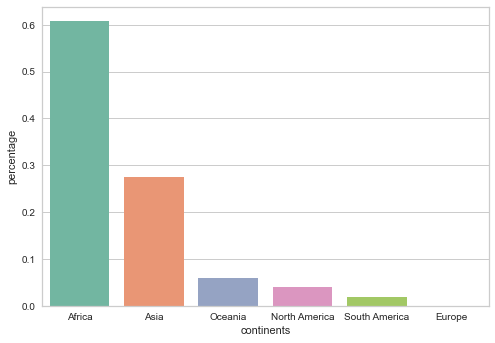

In [585]:
sns.barplot(data=plot_continent_0, x=plot_continent_0.continents, y=plot_continent_0.percentage)
plt.show()

In [586]:
plot_continent_1.rename(index={"continent":"s"}, inplace=True)

In [587]:
plot_continent_1 = plot_continent_1.reset_index()

In [589]:
plot_continent_1.drop(columns="level_0", inplace=True)

In [590]:
plot_continent_1.rename(columns={1:"percentage"}, inplace=True)

In [591]:
plot_continent_1.sort_values(by="percentage", ascending=False, inplace=True)

In [593]:
plot_continent_2.rename(index={"continent":"s"}, inplace=True)

In [594]:
plot_continent_2 = plot_continent_2.reset_index()

In [596]:
plot_continent_2.drop(columns="level_0", inplace=True)

In [597]:
plot_continent_2.rename(columns={2:"percentage"}, inplace=True)

In [598]:
plot_continent_2.sort_values(by="percentage", ascending=False, inplace=True)

In [600]:
plot_continent_3.rename(index={"continent":"s"}, inplace=True)

In [601]:
plot_continent_3 = plot_continent_3.reset_index()

In [603]:
plot_continent_3.drop(columns="level_0", inplace=True)

In [604]:
plot_continent_3.rename(columns={3:"percentage"}, inplace=True)

In [605]:
plot_continent_3.sort_values(by="percentage", ascending=False, inplace=True)

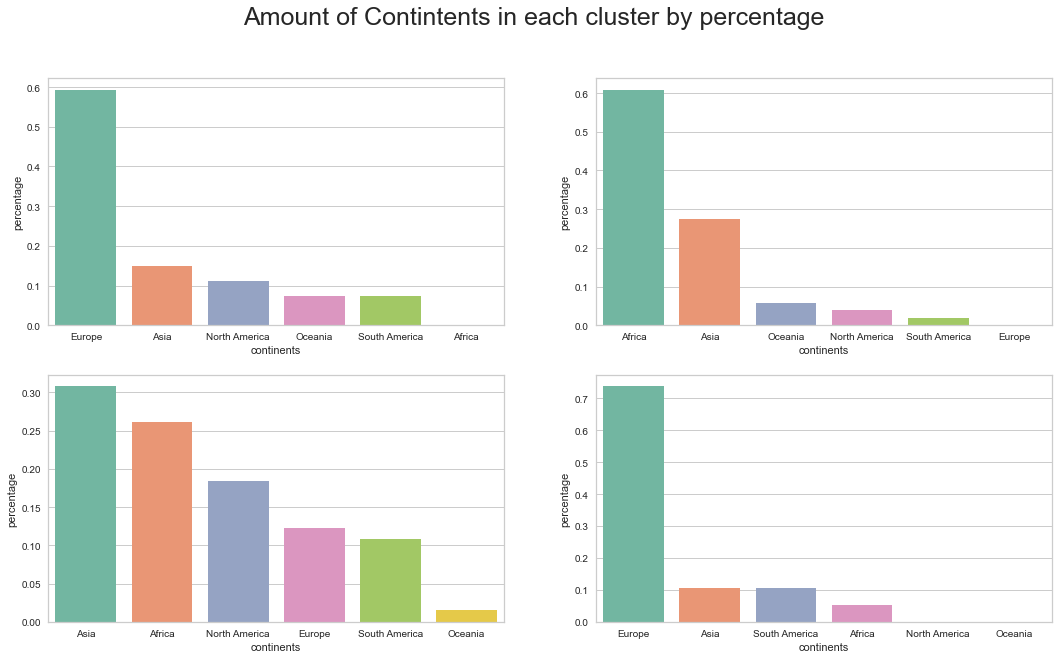

In [683]:
fig, ax = plt.subplots(2,2, figsize=(18,10) )

sns.barplot(data=plot_continent_1, x=plot_continent_1.continents, y=plot_continent_1.percentage,ax = ax[0][0])

sns.barplot(data=plot_continent_3, x=plot_continent_3.continents, y=plot_continent_3.percentage, ax = ax[1][1])

sns.barplot(data=plot_continent_2, x=plot_continent_2.continents, y=plot_continent_2.percentage, ax = ax[1][0])

sns.barplot(data=plot_continent_0, x=plot_continent_0.continents, y=plot_continent_0.percentage, ax = ax[0][1])

fig.suptitle("Amount of Contintents in each cluster by percentage", fontsize=25)

plt.show()

In [686]:
bnp_clusters = df.groupby(["clusters"]).incomeperperson.mean().to_frame()

In [687]:
bnp_clusters.clusters = ["Rika Länder(Europa)", "Medel Rika (Europa)", "Medel Rika (Asien/Afrika/Nordamerika)", "Fattiga Länder (Afrika/Asien)"]

<ipython-input-687-045fa58d86a0>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  bnp_clusters.clusters = ["Rika Länder(Europa)", "Medel Rika (Europa)", "Medel Rika (Asien/Afrika/Nordamerika)", "Fattiga Länder (Afrika/Asien)"]


In [688]:
bnp_clusters.reset_index(inplace=True)

In [689]:
bnp_clusters.sort_values(by="incomeperperson", ascending=False, inplace=True)

In [690]:
bnp_clusters

,clusters,incomeperperson
1,1,27111.989166
3,3,5267.651684
2,2,4324.091426
0,0,1173.701253


In [691]:
bnp_clusters.clusters = ["Rich countries(Europe)", "Average rich countries(Europe)", "average rich countries(Asia/Africa/North America", "poor countries(Africa/Asia)"]



In [692]:
bnp_clusters

,clusters,incomeperperson
1,1,27111.989166
3,3,5267.651684
2,2,4324.091426
0,0,1173.701253


In [693]:
bnp_clusters.index

Int64Index([1, 3, 2, 0], dtype='int64')

In [694]:
bnp_clusters

,clusters,incomeperperson
1,1,27111.989166
3,3,5267.651684
2,2,4324.091426
0,0,1173.701253


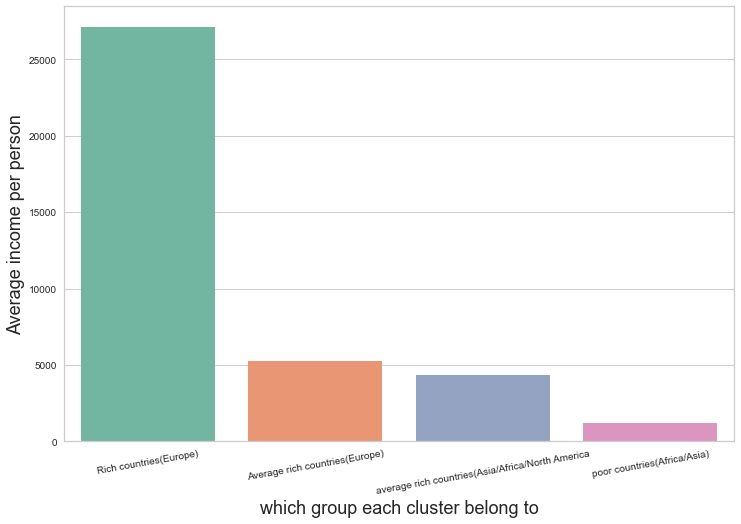

In [697]:
plt.figure(figsize=(12,8))
sns.barplot(data=bnp_clusters, x=bnp_clusters.clusters, y=bnp_clusters.incomeperperson)
plt.xticks(rotation=10)
plt.xlabel("which group each cluster belong to", fontsize=18)
plt.ylabel("Average income per person", fontsize=18)
plt.show()

In [698]:
suicide_rate = df.groupby(["clusters"]).suicideper100th.mean().to_frame()

In [699]:
suicide_rate.reset_index(inplace=True)

In [700]:
suicide_rate.clusters

0    0
1    1
2    2
3    3
Name: clusters, dtype: int64

In [701]:
suicide_rate.clusters = ["Rich countries(Europe)", "Average rich countries(Europe)", "average rich countries(Asia/Africa/North America", "poor countries(Africa/Asia)"]

In [702]:
suicide_rate.sort_values(by="suicideper100th", inplace=True)

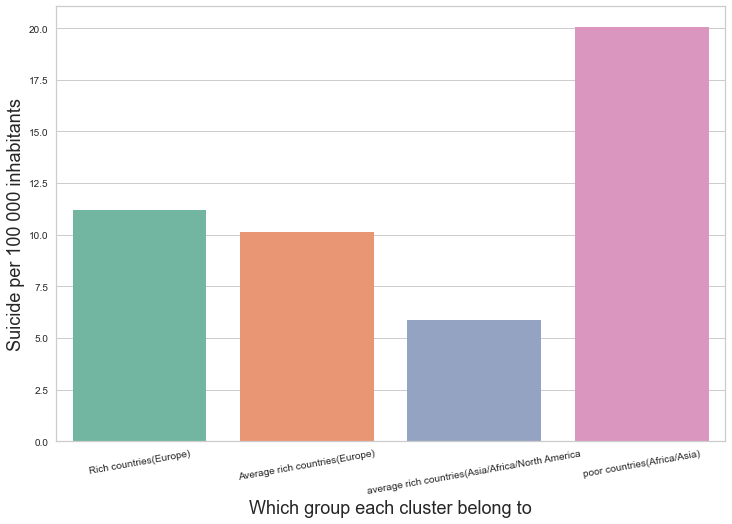

In [714]:
plt.figure(figsize=(12,8))
sns.barplot(data=suicide_rate, x=suicide_rate.clusters, y=suicide_rate.suicideper100th, order=["Rich countries(Europe)", "Average rich countries(Europe)", 
                                                                               "average rich countries(Asia/Africa/North America", "poor countries(Africa/Asia)"])

plt.xticks(rotation=10)
plt.xlabel("Which group each cluster belong to", fontsize=18)
plt.ylabel("Suicide per 100 000 inhabitants", fontsize=18)
plt.show()

In [706]:
df.groupby(["clusters"]).alcconsumption.mean().sum()

34.18787247404585

In [707]:
alc_con = df.groupby(["clusters"]).alcconsumption.mean().to_frame()

In [708]:
alc_con.reset_index(inplace=True)

In [709]:
alc_con.clusters

0    0
1    1
2    2
3    3
Name: clusters, dtype: int64

In [710]:
alc_con.clusters = ["Rich countries(Europe)", "Average rich countries(Europe)", "average rich countries(Asia/Africa/North America", "poor countries(Africa/Asia)"]


In [711]:
alc_con.sort_values(by="alcconsumption", inplace=True)

In [712]:
alc_con.clusters.tolist()

['Rich countries(Europe)',
 'average rich countries(Asia/Africa/North America',
 'Average rich countries(Europe)',
 'poor countries(Africa/Asia)']

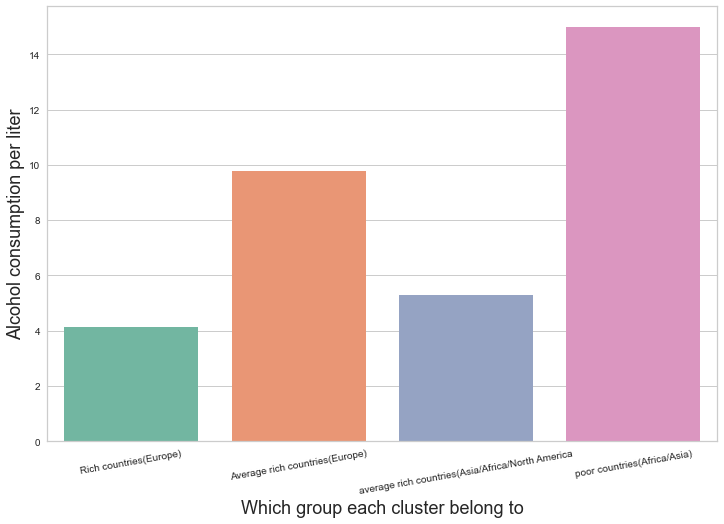

In [715]:
plt.figure(figsize=(12,8))
sns.barplot(data=alc_con, x=alc_con.clusters, y=alc_con.alcconsumption, order=["Rich countries(Europe)", "Average rich countries(Europe)", 
                                                                               "average rich countries(Asia/Africa/North America", "poor countries(Africa/Asia)"])
plt.xticks(rotation=10)
plt.xlabel("Which group each cluster belong to", fontsize=18)
plt.ylabel("Alcohol consumption per liter", fontsize=18)
plt.show()